## Practical5a

The goal of this practical is to investigate dynamic progamming along
scanlines in stereo vision.  In this part of the practical, we build a
basic dynamic programming algorithm, which will solve the same problem as
presented in the notes.  
In practical 5b we will apply this to the stereo problem.  


Use the template below, filling in parts marked "TO DO".
 Note: Optionally, you may want to move the function-skeleton
       function bestPath = dynamicProgram(unaryCosts, pairwiseCosts)...
 from below into its own new and separate dynamicProgram.m file, for 
 easier debugging and re-use.

close any previous figures;

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
plt.close('all')

In [9]:
# define unary costs : unaryCosts[d,j] represents the cost for having
# disparity d at pixel j.

# Emmision (n x m) = (number of options x time steps)
unaryCosts = np.array([[2.0, 1.1, 5.7, 1.5, 6.0, 3.1],
                      [0.8, 4.8, 1.0, 3.0, 6.9, 3.3],
                      [4.3, 2.3, 2.4, 2.4, 6.6, 6.2],
                      [6.4, 0.0, 6.1, 0.8, 7.1, 2.1],
                      [2.3, 2.2, 4.9, 8.9, 1.0, 9.8]])

# Transition (n x n)
# define pairwise costs:  pairwiseCosts[a,b] represents the cost for changing from 
# disparity level A at pixel j to disparity level B at pixel j+1;
pairwiseCosts = np.array([[   0,   2, 100, 100, 100],
                          [   2,   0,   2, 100, 100],
                          [ 100,   2,   0,   2, 100],
                          [ 100, 100,   2,   0,   2],
                          [ 100, 100, 100,   2,   0]])

In [10]:
transition_matrix = np.exp(-unaryCosts)
# print(transition_matrix*1000//1 / 1000)
# print(np.sum(transition_matrix,axis=0))
# print(np.sum(transition_matrix,axis=1))

bestPath = np.array( [[0,1,2,3,4,5,6]] ).T
print(bestPath)
print(bestPath[-2,0])

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]
5


In [49]:
# the goal of this routine is to return the minimum cost dynamic programming
# solution given a set of unary and pairwise costs


def dynamicProgram(unaryCosts, pairwiseCosts):

    # count number of positions (i.e. pixels in the scanline), and nodes at each
    # position (i.e. the number of distinct possible disparities at each position)
    nNodesPerPosition = len(unaryCosts)  # 5
    nPosition = len(unaryCosts[0])  # 6

    # define minimum cost matrix - each element will eventually contain
    # the minimum cost to reach this node from the left hand side.
    # We will update it as we move from left to right
    minimumCost = np.zeros((nNodesPerPosition, nPosition))
    # (5,6)

    # define parent matrix - each element will contain the (vertical) index of
    # the node that preceded it on the path.  Since the first column has no
    # parents, we will leave it set to zeros.
    parents = np.zeros((nNodesPerPosition, nPosition))
    # (5,6)

    # FORWARD PASS

    # TO DO:  fill in first column of minimum cost matrix
    minimumCost[:, 0] = unaryCosts[:, 0]

    # Now run through each position (column)          # n
    for cPosition in range(1, nPosition):
        # print( "Position",cPosition )
        # run through each node (element of column)   # k
        for cNode in range(nNodesPerPosition):

            # now we find the costs of all paths from the previous column to this node
            possPathCosts = np.zeros([nNodesPerPosition, 1])

            for cPrevNode in range(nNodesPerPosition):
                # TO DO  - fill in elements of possPathCosts
                possPathCosts[cPrevNode] = minimumCost[
                    cPrevNode, cPosition - 1] + pairwiseCosts[
                        cPrevNode, cNode] + unaryCosts[cNode, cPosition]
                #placeholder = 0

            # TO DO - find the minimum of the possible paths
            ind_minimum = np.argmin(possPathCosts)
            minimum = min(possPathCosts)

            # TO DO - store the parent index in the parents matrix
            parents[cNode, cPosition] = ind_minimum

            # TO DO - store the minimum cost in the minimumCost matrix
            minimumCost[cNode, cPosition] = minimum

            #print(possPathCosts)

    #print(minimumCost)
    #print(parents)

    #BACKWARD PASS

    #we will now fill in the bestPath vector
    bestPath = np.zeros((nPosition, 1))  # (6,1)

    #TO DO  - find the index of the overall minimum cost from the last column and put this
    #into the last entry of best path
    bestPath[-1, 0] = np.argmin(minimumCost[:, -1])

    # TO DO - find the parent of the node you just found
    # no need

    # run backwards through the cost matrix tracing the best patch
    for cPosition in range(nPosition - 2, -1, -1):
        # TO DO - work through matrix backwards, updating bestPath by tracing parents.
        bestPath[cPosition, 0] = parents[int(bestPath[cPosition +
                                                      1, 0]), cPosition + 1]

    return bestPath

In [50]:
# Now, use dynamic programming to find best solution.
# TO DO - fill in this routine (further down in this file).
bestPath = dynamicProgram(unaryCosts, pairwiseCosts)

<IPython.core.display.Javascript object>


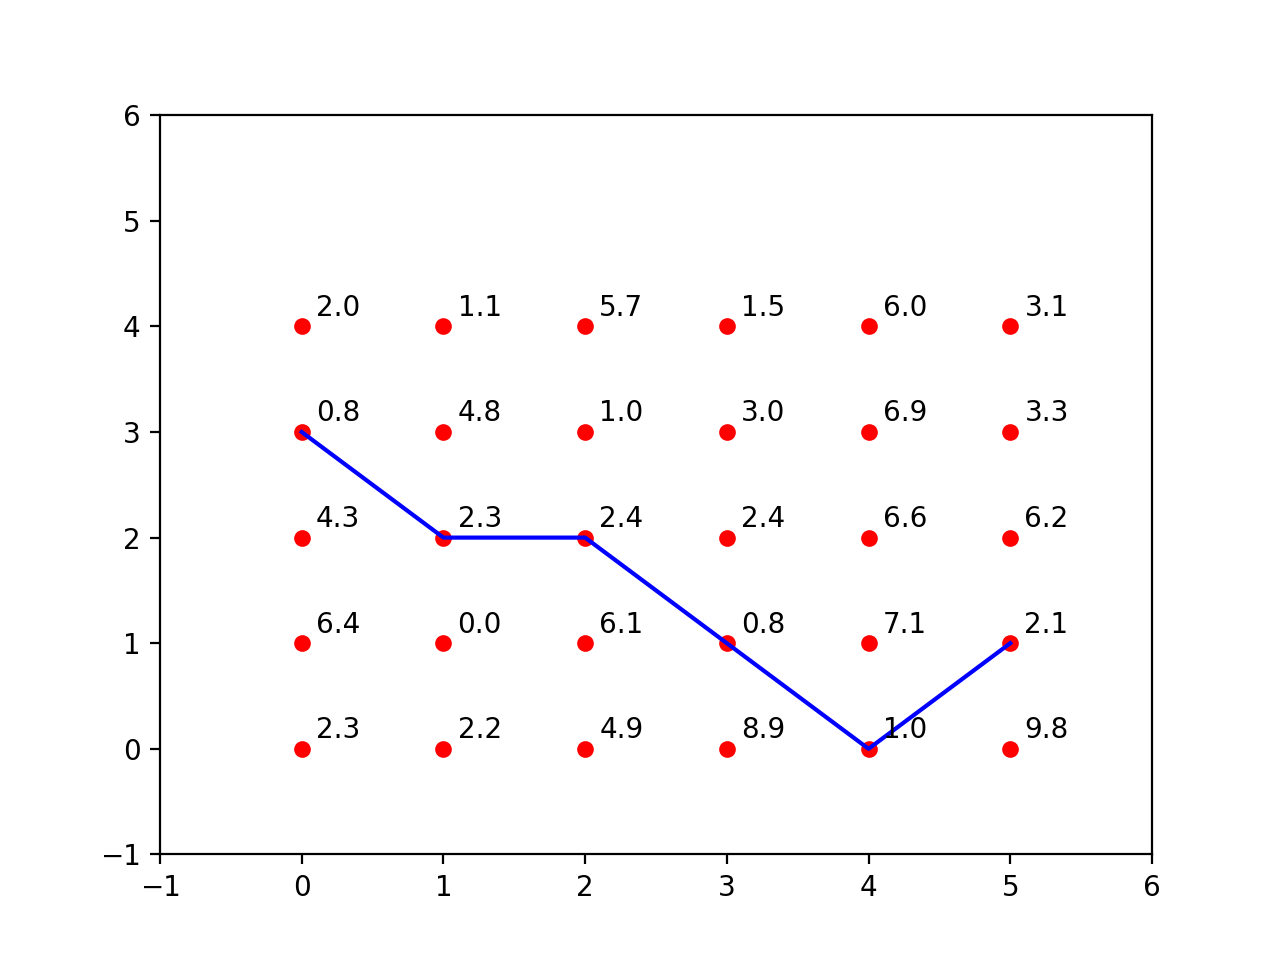

Path Cost = 17.4


In [54]:
# display the nodes
nY = len(unaryCosts)
nX = len(unaryCosts[0])
plt.axis([-1, 6, -1, 6])
for cY in range(nY):
    for cX in range(nX):
        plt.plot(cX, nY - 1 - cY, 'ro', ms=5.)
        plt.text(cX + .1, nY - 1 - cY + .1, unaryCosts[cY, cX])

# display the best path
plt.plot(range(nX), nY - 1 - bestPath, 'b-')
plt.show()

# calculate the cost of the path computed
bestPathCostUnary = np.sum((np.transpose(unaryCosts).reshape(
    (nX * nY, 1)))[(np.add(nY * np.array(range(nX)),
                           np.transpose(bestPath)[0])).astype(int)])
bestPathCostPairwise = np.sum(
    np.transpose(pairwiseCosts).reshape((nY * nY, 1))[np.array(
        [bestPath[0:-1] + nY * bestPath[1:]]).reshape((1, nY)).astype(int)[0]])
bestCost = bestPathCostUnary + bestPathCostPairwise
print('Path Cost =', bestCost)